### Getting data about Chicago Neighborhood

In [123]:
import pandas as pd # import pandas for scrapping data of chicago Neiborhood and community name from html file

In [124]:
 pd.__version__

'0.25.1'

In [125]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago', index_col= False)

In [126]:
d =table[0]

In [127]:
d.columns =[ 'Neighborhood','Community'] # fix the index name with proper name

In [128]:
d.head()

,Neighborhood,Community
0,Albany Park,Albany Park
1,Altgeld Gardens,Riverdale
2,Andersonville,Edgewater
3,Archer Heights,Archer Heights
4,Armour Square,Armour Square


In [129]:
df =d[d['Community'] =='Uptown'].reset_index(drop=True)

In [130]:
df.shape

(6, 2)

In [131]:
df.head(6)

,Neighborhood,Community
0,Buena Park,Uptown
1,Clarendon Park,Uptown
2,Margate Park,Uptown
3,New Chinatown,Uptown
4,Sheridan Park,Uptown
5,Uptown,Uptown


In [132]:
# After looking at the data from we saw there is a neighborhood called New Chinatown. This is the new name of the 
# area argyle park
#So we replace the name with argyle park
df.replace({'argyle park':'New Chinatown'},inplace = True)


In [133]:
Longitude =[-87.652833, -87.648842,-87.652863, -87.6586, -87.6630, -87.6597784]

In [134]:
Latitude =[41.957810,41.963275, 41.972465,41.9734 ,41.9655, 41.9816986] 

In [135]:
df['Latitude'] =Latitude
df['Longitude'] = Longitude

df.head()

,Neighborhood,Community,Latitude,Longitude
0,Buena Park,Uptown,41.957810,-87.652833
1,Clarendon Park,Uptown,41.963275,-87.648842
2,Margate Park,Uptown,41.972465,-87.652863
3,New Chinatown,Uptown,41.973400,-87.658600
4,Sheridan Park,Uptown,41.965500,-87.663000


In [136]:
### Import all the librery for this part of the problem

import numpy as np # library to handle data in a vectorized manner

#import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [137]:
### showing the location on map

In [138]:
# setting up chicago uptown neighborhood on chicago map
address = 'Uptown, Chicago'
geolocator = Nominatim( user_agent = 'Chicago_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Uptown Comminity of chicago are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Uptown Comminity of chicago are 41.9666299, -87.6555458.


In [17]:
# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, community, neighborhood in zip(df['Latitude'], df['Longitude'], df['Community'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, community)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

### Data Using Foursquare API

In [139]:
CLIENT_ID = '****' #  Foursquare ID
CLIENT_SECRET = '****' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [140]:
# getting the name of first neighborhood in Uptown Chicago
df.loc[0,'Neighborhood']

'Buena Park'

In [141]:
# get the neighborhood longitude and latitude value
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Buena Park are 41.95781, -87.652833.


In [142]:
#Now, let's get the top 100 venues that are Harbourfront within a radius of 500 meters.

LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PYH1P1WIETQ33D0VVHAGLRJ2AYDBJ5YBT03ICHX1A5SXOXHE&client_secret=L4E2X3TSAN15PB0XPDAEII53DK2ZEYQLLYZQQSHXAWRTVKB1&v=20180605&ll=41.95781,-87.652833&radius=500&limit=100'

In [143]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ddc2a9b47b43d0024ee0169'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Buena Park',
  'headerFullLocation': 'Buena Park, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 46,
  'suggestedBounds': {'ne': {'lat': 41.962310004500004,
    'lng': -87.64679295571008},
   'sw': {'lat': 41.9533099955, 'lng': -87.65887304428992}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '592980ff286fda44e1a20d35',
       'name': "Klein's Bakery & Cafe",
       'location': {'lat': 41.95832775316602,
        'lng': -87.6529528947291,
        'labeledLatLngs': [{'label': 'display',
          'lat':

In [144]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [145]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Klein's Bakery & Cafe,Bakery,41.958328,-87.652953
1,Michael's Original Pizzeria & Tavern,Pizza Place,41.956879,-87.651865
2,Bar on Buena,Bar,41.958528,-87.653579
3,North Buena Deli and Wine Shop,Wine Shop,41.958474,-87.653173
4,Siam Noodle and Rice,Asian Restaurant,41.957937,-87.652906


In [146]:
# It shows how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

46 venues were returned by Foursquare.


In [147]:
#Create a function to repeat the same process to all the neighborhoods in Downtown Toronto

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [148]:
#Now write the code to run the above function on each neighborhood and create a new dataframe called *dtoronto_venues.

Chicago_uptown_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Buena Park
Clarendon Park
Margate Park
New Chinatown
Sheridan Park
Uptown


In [149]:
Chicago_uptown_venues.shape

(309, 7)

In [150]:
Chicago_uptown_venues['Venue_Category'].value_counts()

Vietnamese Restaurant              27
Coffee Shop                        15
Chinese Restaurant                 14
Bus Station                        12
Mexican Restaurant                 11
Pizza Place                         9
Sushi Restaurant                    8
Sandwich Place                      8
Grocery Store                       8
Pharmacy                            7
Thai Restaurant                     7
Bar                                 6
Convenience Store                   6
Park                                6
American Restaurant                 6
Asian Restaurant                    6
Liquor Store                        5
Bakery                              5
Theater                             5
Indian Restaurant                   4
Train Station                       4
Discount Store                      4
Italian Restaurant                  4
Bubble Tea Shop                     3
Diner                               3
Market                              3
Vegetarian /

In [151]:
# shows the unique catagories of vanues in all the neighbourhood in uptown chicago

print('There are {} uniques categories in uptown Chicago.'.format(len(Chicago_uptown_venues['Venue_Category'].unique())))


There are 103 uniques categories in uptown Chicago.


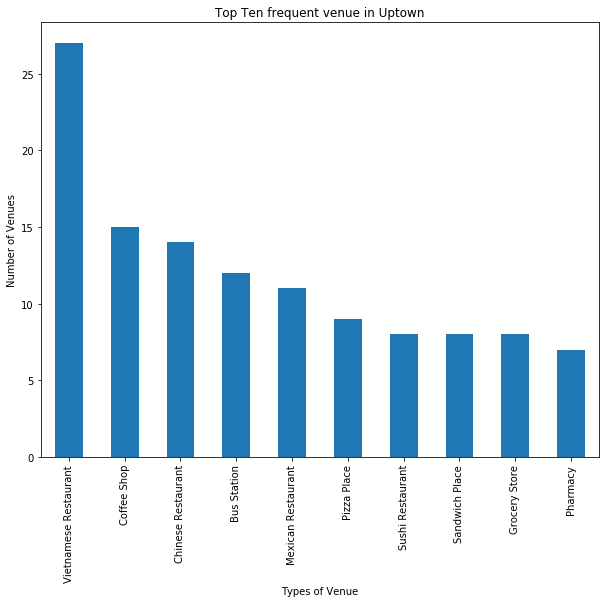

In [152]:
Chicago_uptown_venues.Venue_Category.value_counts()[:10].plot(kind ='bar',figsize =(10,8))
plt.ylabel('Number of Venues')
plt.xlabel('Types of Venue')
plt.title('Top Ten frequent venue in Uptown')
plt.show()

### One Hot Encoding for analyze each neighborhood

In [153]:
# one hot encoding
Chicago_uptown_onehot = pd.get_dummies(Chicago_uptown_venues[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Chicago_uptown_onehot['Neighborhood'] = Chicago_uptown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Chicago_uptown_onehot.columns[-1]] + list(Chicago_uptown_onehot.columns[:-1])
Chicago_uptown_onehot = Chicago_uptown_onehot[fixed_columns]

Chicago_uptown_onehot.head()


,Neighborhood,American Restaurant,Arcade,Asian Restaurant,Athletics & Sports,Automotive Shop,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beach,Breakfast Spot,Bubble Tea Shop,Bus Station,Business Service,Café,Chinese Restaurant,Climbing Gym,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Ethiopian Restaurant,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food & Drink Shop,Fried Chicken Joint,Gas Station,Gay Bar,General Entertainment,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,Hobby Shop,Hot Dog Joint,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Jazz Club,Lawyer,Liquor Store,Lounge,Market,Massage Studio,Mattress Store,Mexican Restaurant,Mobile Phone Shop,Music Venue,Non-Profit,Noodle House,Optical Shop,Other Great Outdoors,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Rental Car Location,Road,Salon / Barbershop,Sandwich Place,Shipping Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Supermarket,Supplement Shop,Sushi Restaurant,Tanning Salon,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Shop
0,Buena Park,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Buena Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Buena Park,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Buena Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Buena Park,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [154]:
uptown_grouped = Chicago_uptown_onehot.groupby('Neighborhood').mean().reset_index()
uptown_grouped.shape


(6, 104)

In [155]:
num_top_venues = 10

for hood in uptown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = uptown_grouped[uptown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Buena Park----
                 venue  freq
0          Coffee Shop  0.11
1             Pharmacy  0.04
2     Asian Restaurant  0.04
3    Convenience Store  0.04
4                  Bar  0.04
5        Hot Dog Joint  0.04
6          Bus Station  0.04
7   Mexican Restaurant  0.04
8  American Restaurant  0.02
9          Flower Shop  0.02


----Clarendon Park----
                  venue  freq
0                  Park  0.12
1   American Restaurant  0.06
2     Convenience Store  0.06
3           Bus Station  0.06
4                 Beach  0.06
5           Coffee Shop  0.06
6    Athletics & Sports  0.06
7  Gym / Fitness Center  0.03
8       Harbor / Marina  0.03
9            Skate Park  0.03


----Margate Park----
                   venue  freq
0  Vietnamese Restaurant  0.17
1            Bus Station  0.05
2            Coffee Shop  0.05
3     Chinese Restaurant  0.05
4          Grocery Store  0.05
5    American Restaurant  0.02
6                Dog Run  0.02
7     Mexican Restaurant  0.02
8    

### Write top venures in a dataframe for all neighborhood

In [156]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [157]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = uptown_grouped['Neighborhood']

for ind in np.arange(uptown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(uptown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Buena Park,Coffee Shop,Pharmacy,Asian Restaurant,Mexican Restaurant,Bar,Bus Station,Hot Dog Joint,Convenience Store,Flower Shop,Massage Studio
1,Clarendon Park,Park,Convenience Store,Coffee Shop,Beach,American Restaurant,Athletics & Sports,Bus Station,General Entertainment,Mexican Restaurant,Field
2,Margate Park,Vietnamese Restaurant,Chinese Restaurant,Grocery Store,Bus Station,Coffee Shop,American Restaurant,Noodle House,Plaza,Pizza Place,Park
3,New Chinatown,Vietnamese Restaurant,Chinese Restaurant,Grocery Store,Mexican Restaurant,Bubble Tea Shop,Pharmacy,Bakery,Plaza,Market,Bus Station
4,Sheridan Park,Mexican Restaurant,Thai Restaurant,Italian Restaurant,Coffee Shop,Pizza Place,Chinese Restaurant,Bus Station,Liquor Store,Sushi Restaurant,Bar


### . Cluster Neighborhoods of uptown

### finding best K

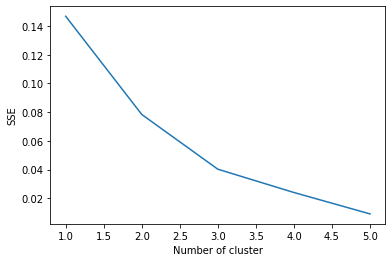

In [158]:
#import pandas as pd
#from sklearn.datasets import load_iris
#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt

#iris = load_iris()
#X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
uptown_grouped_clustering = uptown_grouped.drop('Neighborhood', 1)
data = uptown_grouped_clustering
sse = {}
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### Finding cluster level in chicago uptown neighborhood

In [159]:
# set number of clusters
kclusters = 3

#uptown_grouped_clustering = uptown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(uptown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 1, 1, 0, 2])

In [162]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

uptown_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
uptown_merged = uptown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

uptown_merged.head() # check the last columns!

,Neighborhood,Community,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Buena Park,Uptown,41.957810,-87.652833,0,Coffee Shop,Pharmacy,Asian Restaurant,Mexican Restaurant,Bar,Bus Station,Hot Dog Joint,Convenience Store,Flower Shop,Massage Studio
1,Clarendon Park,Uptown,41.963275,-87.648842,2,Park,Convenience Store,Coffee Shop,Beach,American Restaurant,Athletics & Sports,Bus Station,General Entertainment,Mexican Restaurant,Field
2,Margate Park,Uptown,41.972465,-87.652863,1,Vietnamese Restaurant,Chinese Restaurant,Grocery Store,Bus Station,Coffee Shop,American Restaurant,Noodle House,Plaza,Pizza Place,Park
3,New Chinatown,Uptown,41.973400,-87.658600,1,Vietnamese Restaurant,Chinese Restaurant,Grocery Store,Mexican Restaurant,Bubble Tea Shop,Pharmacy,Bakery,Plaza,Market,Bus Station
4,Sheridan Park,Uptown,41.965500,-87.663000,0,Mexican Restaurant,Thai Restaurant,Italian Restaurant,Coffee Shop,Pizza Place,Chinese Restaurant,Bus Station,Liquor Store,Sushi Restaurant,Bar


In [165]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(uptown_merged['Latitude'], uptown_merged['Longitude'], uptown_merged['Neighborhood'], uptown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        colors=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Now examin the cluster

### Cluster 0

In [166]:
uptown_merged.loc[uptown_merged['Cluster Labels'] == 0, uptown_merged.columns[[0] + list(range(6, uptown_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Buena Park,Pharmacy,Asian Restaurant,Mexican Restaurant,Bar,Bus Station,Hot Dog Joint,Convenience Store,Flower Shop,Massage Studio
4,Sheridan Park,Thai Restaurant,Italian Restaurant,Coffee Shop,Pizza Place,Chinese Restaurant,Bus Station,Liquor Store,Sushi Restaurant,Bar


### Cluster 1

In [167]:
uptown_merged.loc[uptown_merged['Cluster Labels'] == 1, uptown_merged.columns[[0] + list(range(6, uptown_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Margate Park,Chinese Restaurant,Grocery Store,Bus Station,Coffee Shop,American Restaurant,Noodle House,Plaza,Pizza Place,Park
3,New Chinatown,Chinese Restaurant,Grocery Store,Mexican Restaurant,Bubble Tea Shop,Pharmacy,Bakery,Plaza,Market,Bus Station


### Cluster 2

In [168]:
uptown_merged.loc[uptown_merged['Cluster Labels'] == 2, uptown_merged.columns[[0] + list(range(5, uptown_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Clarendon Park,Park,Convenience Store,Coffee Shop,Beach,American Restaurant,Athletics & Sports,Bus Station,General Entertainment,Mexican Restaurant,Field
5,Uptown,Sushi Restaurant,Asian Restaurant,Sandwich Place,Pizza Place,Chinese Restaurant,Vietnamese Restaurant,Bank,Optical Shop,Bus Station,Theater


### How safe Uptown Chicago

In [45]:
c = pd.read_csv('C:/Users/Niaz Morshed/Documents/Crimes_-_Map.csv')

In [46]:
c.head()
 

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JC497784,11/03/2019 11:40:00 AM,032XX N CLARK ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,N,N,1924,44.0,06,NaN,NaN,NaN,NaN,NaN
1,JB556584,11/29/2018 10:04:00 AM,002XX W 23RD ST,0810,THEFT,OVER $500,ALLEY,N,N,914,25.0,06,NaN,NaN,NaN,NaN,NaN
2,JC497415,11/03/2019 04:30:00 AM,107XX S PEORIA ST,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENTIAL YARD (FRONT/BACK),N,N,2233,34.0,14,NaN,NaN,NaN,NaN,NaN
3,JB559847,12/19/2018 01:14:00 PM,042XX W WILCOX ST,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),ALLEY,Y,N,1115,28.0,18,NaN,NaN,NaN,NaN,NaN
4,JB527374,11/23/2018 02:15:00 PM,0000X S STATE ST,0810,THEFT,OVER $500,STREET,N,N,112,42.0,06,NaN,NaN,NaN,NaN,NaN


In [47]:
c.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [48]:
c.dropna(axis =0, inplace =True)

In [49]:
# clean up data
# These are the columns that we want to keep.
# Columns not listed here won't be imported, speeding things up.
c1 = c.loc[: ,['CASE#','DATE  OF OCCURRENCE',' PRIMARY DESCRIPTION','WARD','LATITUDE','LONGITUDE']]

In [50]:
c1.head()

,CASE#,DATE OF OCCURRENCE,PRIMARY DESCRIPTION,WARD,LATITUDE,LONGITUDE
6,JC478822,10/19/2019 12:00:00 PM,BATTERY,11.0,41.866832,-87.639235
7,JC479026,10/19/2019 07:13:00 PM,ASSAULT,3.0,41.811220,-87.615194
8,JC425833,08/10/2019 11:00:00 PM,CRIMINAL DAMAGE,44.0,41.945898,-87.651858
9,JC427264,09/05/2019 03:00:00 PM,THEFT,29.0,41.911965,-87.775314
10,JC422139,09/05/2019 05:00:00 PM,THEFT,32.0,41.930451,-87.663499


In [51]:
c1.shape

(255011, 6)

In [74]:
c46= c1[c1['WARD']==46]
c48 =c1[c1['WARD']==48]
c40 =c1[c1['WARD']==40]
c47 =c1[c1['WARD']==47]

In [75]:
 crime_uptown= pd.concat([c46,c48,c40,c47]) 

In [76]:
crime_uptown.head()

,CASE#,DATE OF OCCURRENCE,PRIMARY DESCRIPTION,WARD,LATITUDE,LONGITUDE
73,JC421371,09/05/2019 12:24:00 PM,DECEPTIVE PRACTICE,46.0,41.962037,-87.645884
100,JC497471,11/03/2019 07:52:00 PM,BATTERY,46.0,41.965599,-87.647776
103,JC421354,09/05/2019 12:24:00 PM,THEFT,46.0,41.962037,-87.645884
306,JC421213,09/05/2019 02:20:00 PM,ASSAULT,46.0,41.969078,-87.655608
313,JC424888,09/05/2019 08:00:00 AM,DECEPTIVE PRACTICE,46.0,41.946459,-87.644655


In [77]:
crime_uptown.dtypes

CASE#                    object
DATE  OF OCCURRENCE      object
 PRIMARY DESCRIPTION     object
WARD                    float64
LATITUDE                float64
LONGITUDE               float64
dtype: object

In [78]:
# cleaning data
crime_uptown.rename(columns={"CASE#": "CASE", "DATE  OF OCCURRENCE": "DATE"," PRIMARY DESCRIPTION":"DESCRIPTION"  }, inplace =True)

In [79]:
crime_uptown.shape

(10545, 6)

In [80]:
#Change the DATE column to a date / time object
crime_uptown["DATE"] =  pd.to_datetime(crime_uptown["DATE"], format='%m/%d/%Y %I:%M:%S %p')

In [81]:
crime_uptown.dtypes 

CASE                   object
DATE           datetime64[ns]
DESCRIPTION            object
WARD                  float64
LATITUDE              float64
LONGITUDE             float64
dtype: object

In [82]:
#now convert date  into dt element
crime_uptown['HOUR'] = crime_uptown['DATE'].dt.hour
crime_uptown['MONTH'] = crime_uptown['DATE'].dt.month_name()

crime_uptown['DAY'] = crime_uptown['DATE'].dt.day_name()
crime_uptown['YEAR'] = crime_uptown['DATE'].dt.year

In [83]:
crime_uptown['MONTH_NO'] = crime_uptown['DATE'].dt.month

In [84]:
# Number of unique Crime categories bases on the Primary Description
crime_uptown.DESCRIPTION.unique()

array(['DECEPTIVE PRACTICE', 'BATTERY', 'THEFT', 'ASSAULT',
       'CRIMINAL TRESPASS', 'CRIMINAL DAMAGE', 'OTHER OFFENSE',
       'BURGLARY', 'GAMBLING', 'ROBBERY', 'PUBLIC PEACE VIOLATION',
       'WEAPONS VIOLATION', 'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN', 'ARSON',
       'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'HOMICIDE',
       'INTIMIDATION', 'OBSCENITY', 'PROSTITUTION', 'KIDNAPPING',
       'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC INDECENCY',
       'LIQUOR LAW VIOLATION'], dtype=object)

In [85]:
crime_uptown.DESCRIPTION.value_counts()[:10]

THEFT                  3297
BATTERY                1779
DECEPTIVE PRACTICE     1080
CRIMINAL DAMAGE        1053
ASSAULT                 789
OTHER OFFENSE           556
BURGLARY                493
MOTOR VEHICLE THEFT     345
CRIMINAL TRESPASS       333
ROBBERY                 263
Name: DESCRIPTION, dtype: int64

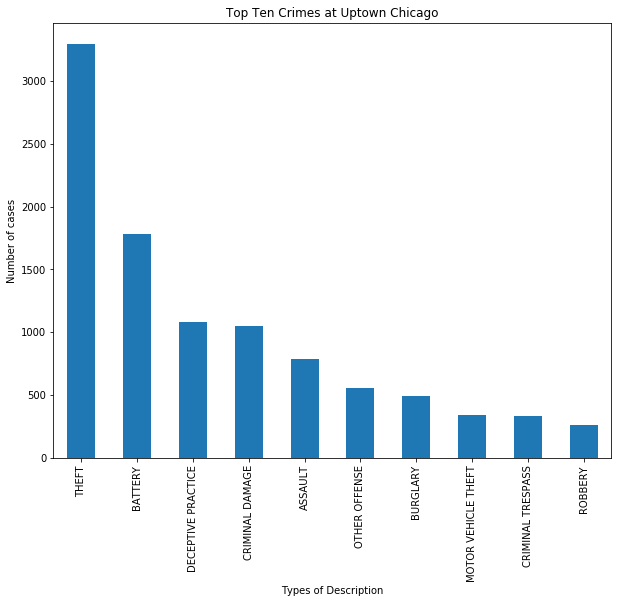

In [86]:
crime_uptown.DESCRIPTION.value_counts()[:10].plot(kind ='bar',figsize =(10,8))
plt.ylabel('Number of cases')
plt.xlabel('Types of Description')
plt.title('Top Ten Crimes at Uptown Chicago')
plt.show()

In [87]:
crime_uptown.head()

,CASE,DATE,DESCRIPTION,WARD,LATITUDE,LONGITUDE,HOUR,MONTH,DAY,YEAR,MONTH_NO
73,JC421371,2019-09-05 12:24:00,DECEPTIVE PRACTICE,46.0,41.962037,-87.645884,12,September,Thursday,2019,9
100,JC497471,2019-11-03 19:52:00,BATTERY,46.0,41.965599,-87.647776,19,November,Sunday,2019,11
103,JC421354,2019-09-05 12:24:00,THEFT,46.0,41.962037,-87.645884,12,September,Thursday,2019,9
306,JC421213,2019-09-05 14:20:00,ASSAULT,46.0,41.969078,-87.655608,14,September,Thursday,2019,9
313,JC424888,2019-09-05 08:00:00,DECEPTIVE PRACTICE,46.0,41.946459,-87.644655,8,September,Thursday,2019,9


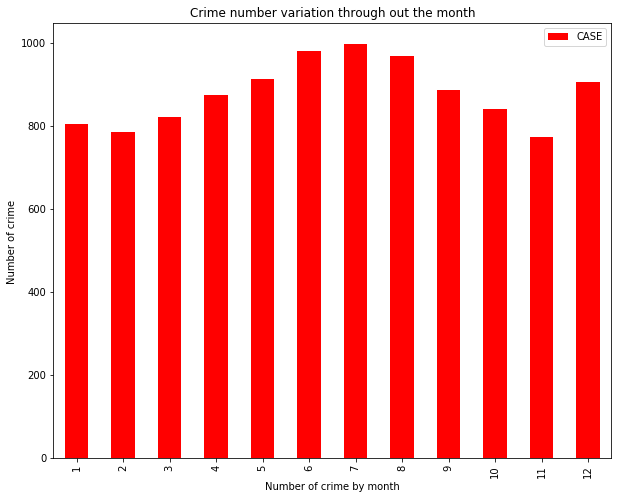

In [88]:
# see some visiualization of crime 
crime_uptown.sort_values(['MONTH_NO'] ,ascending = True).groupby('MONTH_NO').count().plot(y ='CASE',
                                                                                          kind ='bar',
                                                                                       figsize=(10 ,8),
                                                                                         color ='red')
plt.xlabel('Number of crime by month')
plt.ylabel('Number of crime ')
plt.title('Crime number variation through out the month')
plt.show()

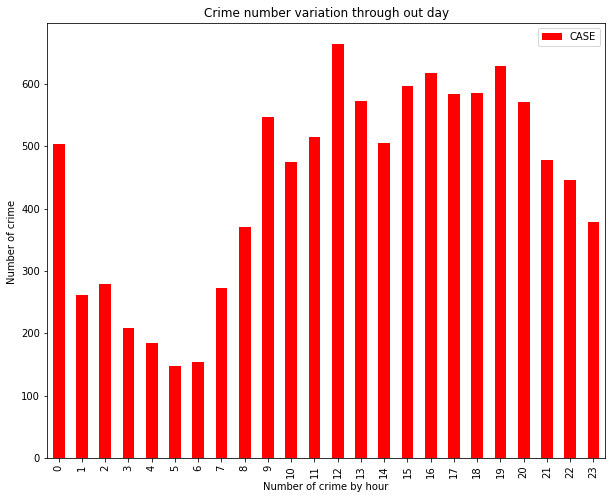

In [89]:
# see some visiualization of crime 
crime_uptown.sort_values(['HOUR'] ,ascending = True).groupby('HOUR').count().plot(y ='CASE',
                                                                                          kind ='bar',
                                                                                       figsize=(10 ,8),
                                                                                         color ='red')
plt.xlabel('Number of crime by hour')
plt.ylabel('Number of crime ')
plt.title('Crime number variation through out day')
plt.show()

### Create a folium map with a different colour per crime


In [90]:

# Create a new data frame with just the top 10 crimes
Top5_crime = crime_uptown[['DESCRIPTION', 'CASE']].groupby(['DESCRIPTION']).count().sort_values('CASE', ascending=False)[:5].axes[0].tolist()

In [91]:
Top5_crime

['THEFT', 'BATTERY', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'ASSAULT']

In [92]:
#Colour each of the top 5 crimes with a different and plot on a Folium map.
 # We have  list of the top 10 crimes from earlier

df_top_crimes = crime_uptown[crime_uptown['DESCRIPTION'].isin(Top5_crime)].copy()



colors = [
    'red',
    'blue',
    'orange',
    'green',
    'purple'
    ]

dict_colors = dict(zip(Top5_crime, colors))

df_top_crimes['colors'] = df_top_crimes.DESCRIPTION.map(dict_colors)


In [93]:
df_top_crimes.head()
#df_top_crimes.shape

,CASE,DATE,DESCRIPTION,WARD,LATITUDE,LONGITUDE,HOUR,MONTH,DAY,YEAR,MONTH_NO,colors
73,JC421371,2019-09-05 12:24:00,DECEPTIVE PRACTICE,46.0,41.962037,-87.645884,12,September,Thursday,2019,9,orange
100,JC497471,2019-11-03 19:52:00,BATTERY,46.0,41.965599,-87.647776,19,November,Sunday,2019,11,blue
103,JC421354,2019-09-05 12:24:00,THEFT,46.0,41.962037,-87.645884,12,September,Thursday,2019,9,red
306,JC421213,2019-09-05 14:20:00,ASSAULT,46.0,41.969078,-87.655608,14,September,Thursday,2019,9,purple
313,JC424888,2019-09-05 08:00:00,DECEPTIVE PRACTICE,46.0,41.946459,-87.644655,8,September,Thursday,2019,9,orange


In [94]:
df_top_crimes.dtypes

CASE                   object
DATE           datetime64[ns]
DESCRIPTION            object
WARD                  float64
LATITUDE              float64
LONGITUDE             float64
HOUR                    int64
MONTH                  object
DAY                    object
YEAR                    int64
MONTH_NO                int64
colors                 object
dtype: object

In [95]:
df_top_crimes_2019 = df_top_crimes[df_top_crimes.YEAR == 2019]
df_top_crimes_2019_nov =df_top_crimes_2019[df_top_crimes_2019.MONTH =='October']

In [96]:
# Define Chicago's geolocation coordinates
uptown_latitude = 41.9665  
uptown_longitude = -87.6533

In [97]:
import string


In [169]:
# Define the world map centered around Chicago with a higher zoom level
uptown_map = folium.Map(location=[uptown_latitude, uptown_longitude], zoom_start=11)

# display world map
uptown_map
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, colors in zip(df_top_crimes_2019_nov.LATITUDE, 
                         df_top_crimes_2019_nov.LONGITUDE, 
                         df_top_crimes_2019_nov.colors):
                                               incidents.add_child(
                                               folium.features.CircleMarker(
                                                       [lat, lng],
                                                    radius=2, # define how big you want the circle markers to be
                                                     color='red',
                                                     fill=True,
                                                     fill_color=colors,
                                                     fill_opacity=0.6
              )
    )
uptown_map.add_child(incidents)

In [99]:
from folium.plugins import MarkerCluster

mc = MarkerCluster()

# Define the world map centered around Chicago with a higher zoom level
uptown_cluster = folium.Map(location=[uptown_latitude, uptown_longitude], zoom_start=13)

# display world map
uptown_cluster

#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in df_top_crimes_2019_nov.itertuples():
    mc.add_child(folium.Marker(
        location=[row.LATITUDE,  row.LONGITUDE],
                 popup=row.DESCRIPTION))

uptown_cluster.add_child(mc)
uptown_cluster

In [100]:
from folium import plugins
from folium.plugins import HeatMap

uptown_heatmap = folium.Map(location=[uptown_latitude, uptown_longitude], zoom_start=13) 

# List comprehension to make out list of lists
heat_data = [[row['LATITUDE'], 
              row['LONGITUDE']] for index, row in df_top_crimes_2019_nov.iterrows()]

# Plot it on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(uptown_heatmap)

# Display the map
uptown_heatmap